In [7]:
from zernpy import ZernPol
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../FastZernike/"))

from zernipax.basis import ZernikePolynomial
from zernipax.zernike import *

import mpmath
import matplotlib

In [9]:
res = 50
basis = ZernikePolynomial(L=res, M=res, spectral_indexing="ansi", sym="cos")
ms = basis.modes[:,1]
ns = basis.modes[:,0]
r = np.linspace(0, 1, 100)
all_zernipax = zernike_radial(r, basis.modes[:,0], basis.modes[:,1], 0)

In [10]:
def fun():
    all = []
    for i in range(len(ms)):
        zp = ZernPol(m=int(ms[i]), n=int(ns[i]))   
        all.append(zp.radial(r))

    return np.array(all)

all_zernpy = fun().T

In [11]:
# Exact computation
mpmath.mp.dps = 100
def fun2():
    c = zernike_radial_coeffs(basis.modes[:, 0], basis.modes[:, 1], exact=True)
    zt0 = np.array([np.asarray(mpmath.polyval(list(ci), r), dtype=float) for ci in c]).T
    return zt0

%timeit fun2()
zt0 = fun2()

9.95 s ± 1.71 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


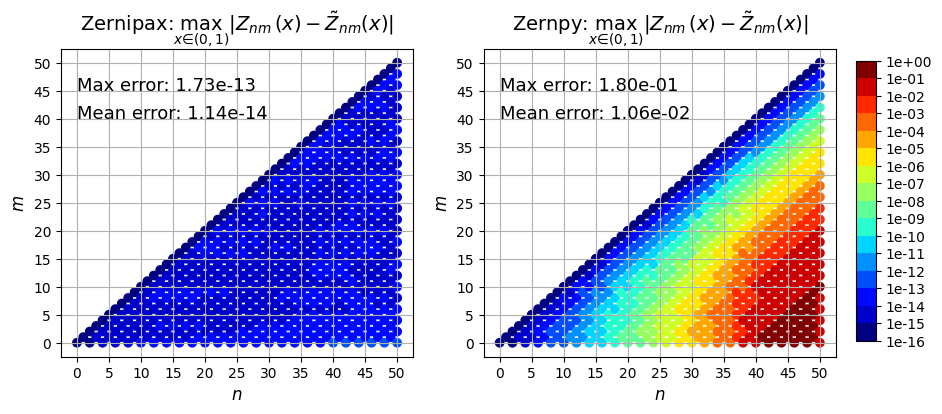

In [12]:
from zernipax.plotting import plot_comparison
plot_comparison(zt0, (all_zernipax, all_zernpy), basis, 0, "absolute", names=("Zernipax:", "Zernpy:"), print_error=True)